#Report 3
By: Sean Rock

###Optimum Design of an I-beam with Non-dominated Sorting Genetic Algorithm
In building construction, horizontal structural components that bear loads perpendicular to their longitudinal direction are typically beams. To support the combined weight of stacked walls and transfer the support load, larger and heavier beams called transfer beams are often used.

In this report, I install a Python package in order to perform multi-objective engineering design optimization for a load-bearing I-beam. In order to prevent one of the objectives from dominating, I chose the Non-dominated Sorting Genetic Algorithm-II (NSGA-II) from the pymoo library (https://pymoo.org/algorithms/moo/nsga2.html).

In [ ]:
pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=2ab7e162be03b06952ddeb672f6ada0180e89d56092e193aedfa9b507867343d
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


The general optimization goal for this I-beam problem is to minimize F=[f1,f2]T where the cross section area (f1) and the static deflection (f2) of the I-beam are defined as:

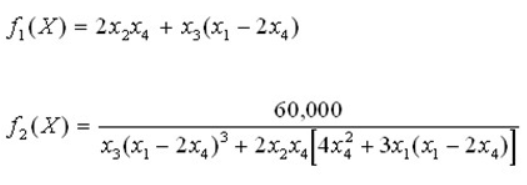

The two objectives are conflicting in nature since minimization of f1 will result in maximization of f2 and vice versa.
The geometric side constraints are: 10 ≤ X1 ≤ 80, 10 ≤ X2 ≤ 50, 0.9 ≤ X3 ≤ 5.0, 0.9 ≤ X4 ≤ 5.0.

The Non-dominant Sorting Genetic Algorithm returns the points that are Pareto optimal or non-dominated. Dominated solutions are ones in which one objective can be improved while the other remains the same or better. Basically a solutions is Pareto optimal when no objective can be improved without negatively affecting another objective. The set of pareto efficient, non-dominated solutions form the Pareto front.

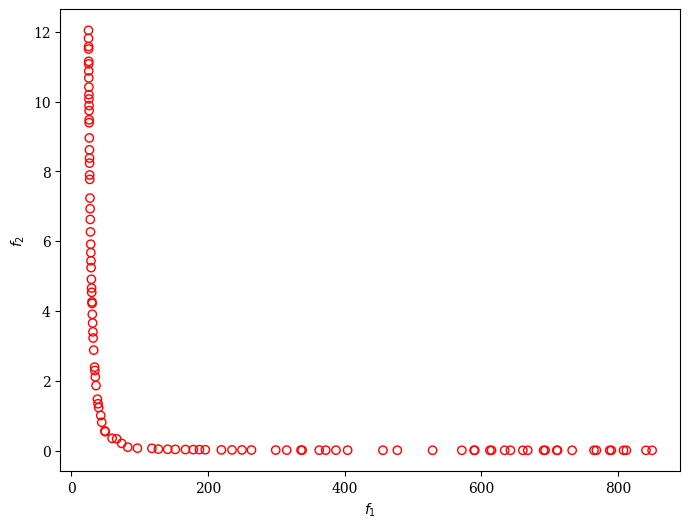

In [28]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import pymoo.gradient.toolbox as anp

import math
import numpy as np


class MyProblem(Problem):

    def __init__(self):
        low =np.array([10.0,10.0,0.9,0.9])
        high =np.array([80.0,50.0,5.0,5.0])
        super().__init__(n_var=4, n_obj=2, xl=low, xu=high, vtype=float)


    def _evaluate(self, x, out, *args, **kwargs):
        f1 = (((2*x[:,1])*x[:,3])+(x[:,2]*(x[:,0]-(2*x[:,3]))))
        f2 = (60000/((x[:,2]*(x[:,0]-2*x[:,3])**3) +2*x[:,1]*x[:,3]*((4*(x[:,3]**2))+3*x[:,0]*(x[:,0]-2*x[:,3]))))

        out["F"] = anp.column_stack([f1,f2])


problem = MyProblem()


algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

The results of running the Optimum Design of an I-beam formula in NSGA-II matched my expectations based off the outcomes of regular genetic algorithm runs. When I had ran the problem through a normal ga and prioritized f2, the best solutions had much lower values like seen on the top left side of the graph. When f1 was prioritized, the totals of the solutions balooned like seen at the bottom the graph.